# Compute Drawdowns

In [38]:
import pandas as pd

In [39]:
# Read source file data
data=pd.read_csv(r'C:\data\Portfolios_Formed_on_ME_monthly_EW.csv',
                 header=0, index_col=0, parse_dates=True, na_values=-99.99 )
# Filter data to selected columns
returns=data[['Lo 10', 'Hi 10']]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


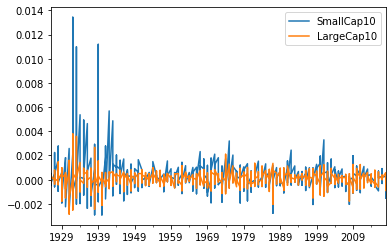

In [57]:
#Rename columns
returns.columns=['SmallCap10', 'LargeCap10']
# get in percent
returns= returns/100
# plot a graph
returns.plot.line()

In [59]:
#  format returns index to datetime
returns.index=pd.to_datetime(returns.index, format="%Y%M")

returns.index


TypeError: Passing PeriodDtype data is invalid.  Use `data.to_timestamp()` instead

In [60]:
# Filter Month period only
returns.index=returns.index.to_period('M')


AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [43]:
returns.head()

,SmallCap10,LargeCap10
1926-01,-0.0145,0.0329
1926-01,0.0512,0.0370
1926-01,0.0093,0.0067
1926-01,-0.0484,-0.0243
1926-01,-0.0078,0.0270


In [16]:
returns["1975"]

,SmallCap10,LargeCap10
1975-01,0.003202,0.001286
1975-01,0.000657,0.000613
1975-01,0.000989,0.000414
1975-01,0.000288,0.000531
1975-01,0.000811,0.000610
1975-01,0.000779,0.000524
1975-01,0.000218,-0.000703
1975-01,-0.000525,-0.000177
1975-01,-0.000351,-0.000468
1975-01,-0.000009,0.000620


In [44]:
returns.index

PeriodIndex(['1926-01', '1926-01', '1926-01', '1926-01', '1926-01', '1926-01',
             '1927-01', '1927-01', '1927-01', '1927-01',
             ...
             '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01'],
            dtype='period[M]', length=1110, freq='M')

In [19]:
returns.info()



<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-01 to 2018-01
Freq: M
Data columns (total 2 columns):
SmallCap10    1110 non-null float64
LargeCap10    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


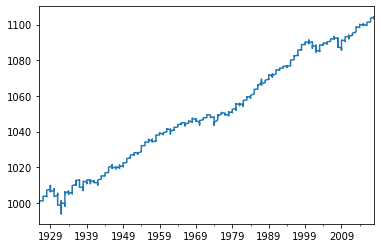

In [61]:
# Compute Wealth index , 1000 is portfolio wealth
wealth_index=1000*(1+returns["LargeCap10"]).cumprod()
wealth_index.head()
wealth_index.plot()

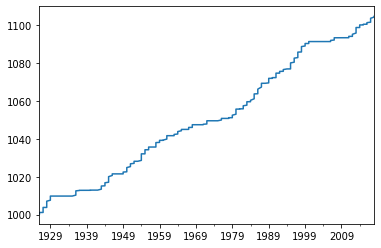

In [62]:
# compute previous peaks
previous_peaks=wealth_index.cummax()
previous_peaks.plot()

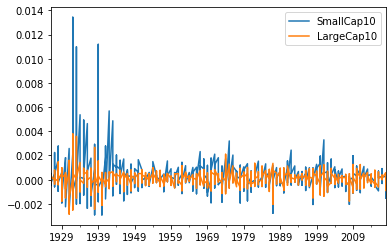

In [24]:
returns.plot()

In [25]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-01 to 2018-01
Freq: M
Data columns (total 2 columns):
SmallCap10    1110 non-null float64
LargeCap10    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


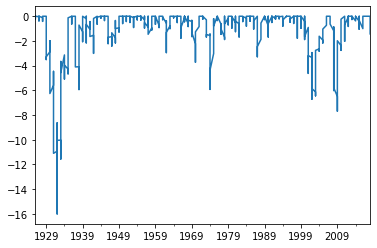

In [63]:
#compute drawdown
drawdown=(wealth_index-previous_peaks)
drawdown.plot()

In [55]:
 drawdown.head()

1926-01     0.000000
1926-01     0.000000
1926-01     0.000000
1926-01   -26.202539
1926-01     0.000000
Freq: M, Name: LargeCap10, dtype: float64

In [64]:
drawdown.min()

-16.001846974686828

In [66]:
drawdown["1975":].min()

-7.683381346202623

In [67]:
drawdown["1975":].idxmin()

Period('2009-01', 'M')

In [68]:
drawdown.idxmin()

Period('1932-01', 'M')

In [73]:
# Create a function to repeat this calculation for small cap
def drawdowns(return_series:pd.Series):
    '''
    Takes a time series of asset returns computes and 
    returns a dataframe that contains:
        wealth index
        previous peaks
        percent downs
        
    '''
    wealth_index=1000*(1+return_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdown
    })
    
    

In [74]:
drawdowns(returns["LargeCap10"]).head()

,Wealth,Peaks,Drawdown
1926-01,1000.329000,1000.329000,0.000000
1926-01,1000.699122,1000.699122,0.000000
1926-01,1000.766169,1000.766169,0.000000
1926-01,1000.522982,1000.766169,-0.000243
1926-01,1000.793124,1000.793124,0.000000


In [75]:
drawdowns(returns["LargeCap10"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-01,1000.329000,1000.329000
1926-01,1000.699122,1000.699122
1926-01,1000.766169,1000.766169
1926-01,1000.522982,1000.766169
1926-01,1000.793124,1000.793124


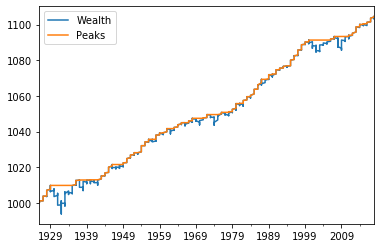

In [76]:
drawdowns(returns["LargeCap10"])[["Wealth", "Peaks"]].plot()

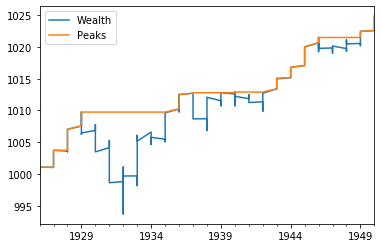

In [78]:
drawdowns(returns[:"1950"]["LargeCap10"])[["Wealth", "Peaks"]].plot()

In [89]:
#Get lowest drawdown value
drawdowns(returns["LargeCap10"])["Drawdown"].min()

-0.015847287938135644

In [91]:
# when was this lowest drawdown took place, indexed by datetime so we should get it by year and month
drawdowns(returns["SmallCap10"])["Drawdown"].idxmin()

Period('1932-01', 'M')